#Student Name: Ganapathy S
#Student ID: 18202799

mean 3.492
variance 3.033936


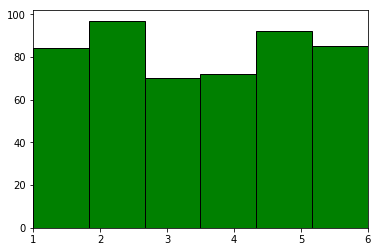

In [6]:
import pylab
import math
import random as random

trails = 500
random_try = []
for i in range(trails):
    random_try.append(random.randint(0,500))

# Rolling the dice 500 times
v = pylab.randint(1,7,size=(trails))

print('mean',pylab.mean(v))
print('variance',pylab.var(v))

pylab.hist(v,bins=6, facecolor='green', edgecolor='black') # histogram of the outcoming
pylab.xlim(1,6)
pylab.show()